Project 1- Airbnb Analysis

In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
import gmaps
import requests
import numpy as np
from scipy.stats import linregress
from matplotlib import cm
from config import api_key

In [2]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
master_df = pd.DataFrame(df)
master_df = master_df.loc[df['number_of_reviews']>1]
master_df = master_df[master_df['review_scores_rating'].notnull()]
master_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20180827015748,2018-08-27,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,3,3.00
1,590,https://www.airbnb.com/rooms/590,20180827015748,2018-08-27,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,t,2018-BFN-O0O5791,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,4.71
2,592,https://www.airbnb.com/rooms/592,20180827015748,2018-08-27,private,Denver short-term-rental license number 2016-B...,This is a basement room. You can sometimes he...,Denver short-term-rental license number 2016-B...,none,NaN,...,t,2016-BFN-0008735,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,1.23
3,686,https://www.airbnb.com/rooms/686,20180827015748,2018-08-27,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,2016-BFN-0008368,"{""Colorado State"","" the City and County of Den...",t,f,moderate,f,f,3,1.91
4,1940,https://www.airbnb.com/rooms/1940,20180827015748,2018-08-27,Baker Studio Close to EVERYTHING,Significant discounts for week or month+ reser...,The studio is highly functional and cozy. It ...,Significant discounts for week or month+ reser...,none,Baker is a historic neighborhood with quaint V...,...,t,344114-070056 2018-BFN-0002596,"{""Colorado State"","" the City and County of Den...",f,f,strict_14_with_grace_period,f,f,1,1.08


Question 1: How does the overall number of listings in an area/neighborhood affect a review score? 

In [3]:
coordinates = master_df[['latitude','longitude']]
df_group = master_df.groupby('neighbourhood_cleansed')
df_group['id'].count().sort_values(ascending = False)

neighbourhood_cleansed
Five Points                     350
Highland                        286
Capitol Hill                    228
Speer                           150
Sunnyside                       139
Whittier                        118
Baker                           117
West Highland                   117
Lincoln Park                    108
City Park West                  104
Berkeley                        100
Sloan Lake                       99
West Colfax                      96
Union Station                    93
Congress Park                    93
Jefferson Park                   88
Stapleton                        86
Gateway - Green Valley Ranch     86
Cheesman Park                    85
CBD                              85
Cole                             70
Clayton                          70
Washington Park West             66
North Capitol Hill               63
Platt Park                       59
North Park Hill                  58
Northeast Park Hill              43
Skyla

In [4]:
x = df_group['id'].count()
y = df_group['review_scores_rating'].mean()
z = df_group['number_of_reviews'].sum()
neighbourhood = list(y.index)

In [5]:
df1 = pd.concat([x,y,z], axis = 1)
df1.sort_values('number_of_reviews')

,id,review_scores_rating,number_of_reviews
neighbourhood_cleansed,,,
Kennedy,1,100.000000,3
Auraria,1,100.000000,7
Sun Valley,2,100.000000,12
Wellshire,4,99.500000,56
Elyria Swansea,2,95.500000,83
DIA,1,99.000000,95
Fort Logan,10,97.700000,172
Windsor,10,94.200000,193
Marston,9,98.888889,219


In [6]:
df_norm = df1.loc[df1['number_of_reviews']>13]
df_outliers = df1.loc[df1['number_of_reviews']<13]

In [7]:
sum_norm_reviews = df_norm['number_of_reviews'].sum()
sum_norm_listings = df_norm['id'].sum()
sum_norm_neighborhoods = df_norm['id'].count()
sum_outliers_reviews = df_outliers['number_of_reviews'].sum()
sum_outliers_listings = df_outliers['id'].sum()
sum_outliers_neighborhoods = df_outliers['id'].count()
percentage_outliers_reviews = "{0:.2f}%".format((sum_outliers_reviews/(sum_outliers_reviews+sum_norm_reviews))*100)
percentage_outliers_listings = "{0:.2f}%".format((sum_outliers_listings/(sum_outliers_listings+sum_norm_listings))*100)
percentage_outliers_neighborhoods = "{0:.2f}%".format((sum_outliers_neighborhoods/(sum_outliers_neighborhoods+sum_norm_neighborhoods))*100)

In [8]:
index = ['Normal', 'Outliers', 'Outliers Percentage']
df_summary = pd.DataFrame({
    'Reviews':[sum_norm_reviews, sum_outliers_reviews, percentage_outliers_reviews],
    'Listings':[sum_norm_listings, sum_outliers_listings, percentage_outliers_listings],
    'Neighborhoods':[sum_norm_neighborhoods, sum_outliers_neighborhoods, percentage_outliers_neighborhoods]
}, index =index )
df_summary

,Reviews,Listings,Neighborhoods
Normal,183587,4077,75
Outliers,22,4,3
Outliers Percentage,0.01%,0.10%,3.85%


In [9]:
df_norm.head()

,id,review_scores_rating,number_of_reviews
neighbourhood_cleansed,,,
Athmar Park,28,95.392857,1054
Baker,117,97.247863,5484
Barnum,25,95.760000,987
Barnum West,21,96.571429,785
Bear Valley,6,98.000000,259


(90, 100)

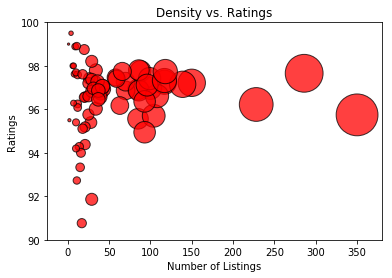

In [10]:
plt.scatter(df_norm['id'], df_norm['review_scores_rating'], marker="o", facecolors="red", edgecolors="black", alpha=0.75, s = df_norm['id']*5)
plt.xlabel('Number of Listings')
plt.ylabel('Ratings')
plt.title('Density vs. Ratings')
plt.xlim(-25,380)
plt.ylim(90,100)

In [11]:
df_norm['id'].max()

350

In [12]:
master_df['review_scores_rating'].mean()

96.7204116638079

In [13]:
avg = master_df['review_scores_rating'].min()
diff = master_df['review_scores_rating'].max() - master_df['review_scores_rating'].min()
master_df['norm_review_scores_rating'] = master_df['review_scores_rating'].apply(lambda x: (x-avg)/diff) 


In [14]:
gmaps.configure(api_key = api_key)
review_fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(coordinates, weights = master_df['norm_review_scores_rating'], 
                                    max_intensity = 50, point_radius = 8)
review_fig.add_layer(heatmap_layer)
review_fig

Figure(layout=FigureLayout(height='420px'))

Question 2: Are there areas/neighborhoods that have a higher review score naturally? 

In [4]:
#locations held under variable coordinates

In [15]:
#plot density heatmap
gmaps.configure(api_key=api_key)
density_fig = gmaps.figure()

#create heatlayer
heat_layer = gmaps.heatmap_layer(coordinates)

#add heatlayer to fig
density_fig.add_layer(heat_layer)

density_fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
##bar chart of count of properties in each neighborhood

#count groupby neighborhood
neighborhood_count = df_group.count()

neighborhood_count.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,norm_review_scores_rating
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Athmar Park,28,28,28,28,28,27,21,27,28,17,...,19,28,28,28,28,28,28,28,28,28
Auraria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Baker,117,117,117,117,117,117,107,117,117,105,...,81,116,117,117,117,117,117,117,117,117
Barnum,25,25,25,25,25,25,24,25,25,21,...,14,25,25,25,25,25,25,25,25,25
Barnum West,21,21,21,21,21,21,20,21,21,21,...,4,17,21,21,21,21,21,21,21,21


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77],
 <a list of 78 Text xticklabel objects>)

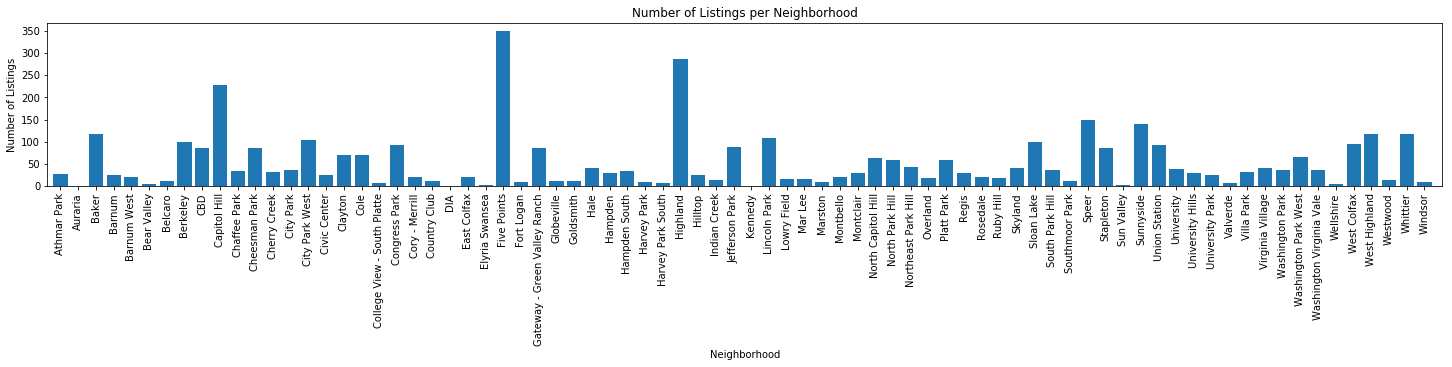

In [17]:
#reset index
neighborhood_count = neighborhood_count.reset_index()

#create bar chart
plt.figure(figsize=(25,3))
plt.bar(neighborhood_count['neighbourhood_cleansed'], neighborhood_count['id'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Neighborhood')
plt.xlim(-0.75, len(neighborhood_count['neighbourhood_cleansed']))
plt.xticks(rotation=90)

In [18]:
#hold night club, restaurant and count variables 
night_clubs = []
restaurants = []
count = 1

# loop through lat and long get restaurant and night club count within 800 meter radius of listing
for index, row in coordinates.iterrows():
    
    #variables for all params
    target_coordinates = str(row['latitude']) + ', ' + str(row['longitude'])
    target_radius = 800
    nc_target_type = 'night_club'
    rest_target_type = 'restaurant'

    # set up a parameters dictionary for night club
    nc_params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": nc_target_type,
        "key": api_key
    }
    
    # set up a parameters dictionary for restaurants
    rest_params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": rest_target_type,
        "key": api_key
    }

    # base url
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # run a request using our params dictionary for night clubs
    nc_response = requests.get(base_url, params=nc_params).json()
    
    night_clubs.append(len(nc_response['results']))
    
    # run a request using our params dictionary for night clubs
    rest_response = requests.get(base_url, params=rest_params).json()
    
    restaurants.append(len(rest_response['results']))
    
    print(count)
    count += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


In [19]:
#plot heatmap restaurants
gmaps.configure(api_key=api_key)
rest_fig = gmaps.figure()

#create heatlayer
heat_layer = gmaps.heatmap_layer(coordinates, weights=restaurants)

#add heatlayer to fig
rest_fig.add_layer(heat_layer)

rest_fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
#plot heatmap night clubs
gmaps.configure(api_key=api_key)
nc_fig = gmaps.figure()

#create heatlayer
heat_layer = gmaps.heatmap_layer(coordinates, weights=night_clubs)

#add heatlayer to fig
nc_fig.add_layer(heat_layer)

nc_fig

Figure(layout=FigureLayout(height='420px'))

Question 3: Does the type of property affect a review score?

In [21]:
#Create a new DataFrame to hold useful columns
new_df = df[["property_type", "id", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "bed_type", "review_scores_rating"]]
new_df.head()

,property_type,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating
0,Guesthouse,360,Entire home/apt,5,1.0,2,2.0,Futon,100.0
1,House,590,Private room,3,1.0,1,1.0,Real Bed,96.0
2,House,592,Private room,2,1.0,1,1.0,Real Bed,97.0
3,House,686,Private room,2,2.0,1,1.0,Real Bed,95.0
4,Guesthouse,1940,Entire home/apt,2,1.0,0,1.0,Real Bed,99.0


In [22]:
#Groupby the property type and average rating/number of properties
prop_group = new_df.groupby(['property_type'])
prop_count = prop_group["id"].count()
rating_mean = prop_group["review_scores_rating"].mean()
prof_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
prof_df = prof_df.dropna(how="any")
prof_df = prof_df.sort_values("Average Rating", ascending=False)
prof_df.head()

,Property Count,Average Rating
property_type,,
Villa,7,99.750000
Tiny house,5,99.600000
Guesthouse,121,98.286957
Tent,2,98.000000
Townhouse,608,97.812044


In [23]:
count_df = prof_df.sort_values("Property Count", ascending=False)

Text(0,0.5,'Average Rating')

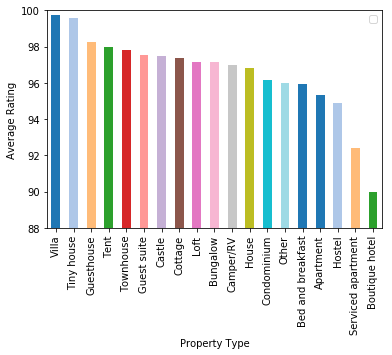

In [24]:
cmap = plt.cm.tab20
colors = cmap(np.linspace(0.,1., len("Average Rating")))
plot_df = prof_df.plot.bar(y="Average Rating", color=colors)
plt.ylim(88, 100)
plt.legend("")
plt.xlabel("Property Type")
plt.ylabel("Average Rating")

Text(0.5,1,'Number of Properties of Each Property Type')

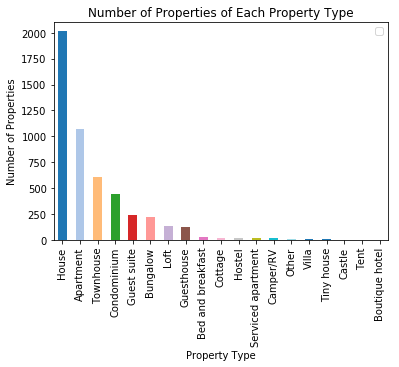

In [25]:
colors = cmap(np.linspace(0.,1., len("Property Count")))
count_df = count_df.plot.bar(y="Property Count", color=colors)
plt.ylim(0, 2100)
plt.legend("")
plt.xlabel("Property Type")
plt.ylabel("Number of Properties")
plt.title("Number of Properties of Each Property Type")

In [26]:
#Groupby room type and average rating
room_group = new_df.groupby(['room_type'])
prop_count = room_group["id"].count()
rating_mean = room_group["review_scores_rating"].mean()
room_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
room_df = room_df.dropna(how="any")
room_df = room_df.sort_values("Average Rating", ascending=False)
room_df.head()

,Property Count,Average Rating
room_type,,
Private room,1239,96.879231
Entire home/apt,3664,96.688679
Shared room,81,93.492308


Text(0.5,1,'Average Rating of Each Room Type')

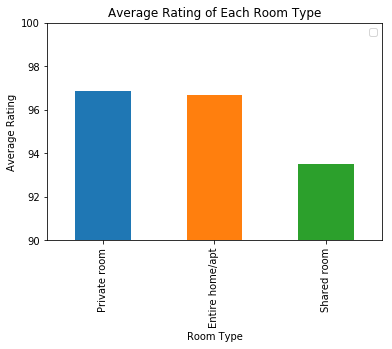

In [27]:
colors = cmap(np.linspace(0.,1., len("Average Rating")))
room = room_df.plot.bar(y="Average Rating")
plt.ylim(90, 100)
plt.legend("")
plt.xlabel("Room Type")
plt.ylabel("Average Rating")
plt.title("Average Rating of Each Room Type")

Text(0.5,1,'Average Rating of Each Room Type')

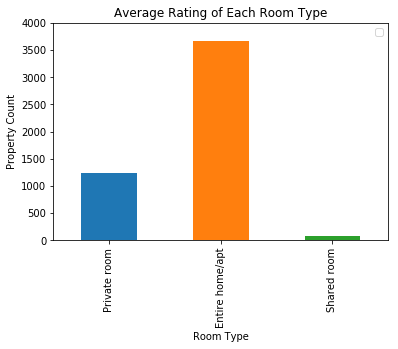

In [28]:
room2 = room_df.plot.bar(y="Property Count")
plt.ylim(0, 4000)
plt.legend("")
plt.xlabel("Room Type")
plt.ylabel("Property Count")
plt.title("Average Rating of Each Room Type")

In [29]:
#Groupby bed type and average rating
bed_group = new_df.groupby(['bed_type'])
prop_count = bed_group["id"].count()
rating_mean = bed_group["review_scores_rating"].mean()
bed_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
bed_df = bed_df.sort_values("Average Rating", ascending=False)
bed_df

,Property Count,Average Rating
bed_type,,
Futon,17,97.941176
Pull-out Sofa,13,96.818182
Real Bed,4939,96.713853
Airbed,10,89.500000
Couch,5,85.000000


Text(0.5,1,'Average Rating by Bed Type')

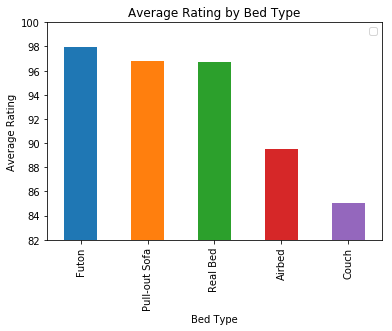

In [30]:
bed_type = bed_df.plot.bar(y="Average Rating")
plt.ylim(82, 100)
plt.legend("")
plt.xlabel("Bed Type")
plt.ylabel("Average Rating")
plt.title("Average Rating by Bed Type")

In [31]:
#Group by the number of people the listing accommodates
num_group = new_df.groupby(['accommodates'])
prop_count = num_group["id"].count()
rating_mean = num_group["review_scores_rating"].mean()
num_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
num_df = num_df.sort_values("Average Rating", ascending=False)
num_df.head()

,Property Count,Average Rating
accommodates,,
13,6,99.833333
15,7,98.333333
11,23,98.000000
7,114,97.912621
16,49,97.500000


Text(0.5,1,'Average Rating by Accommodation Number')

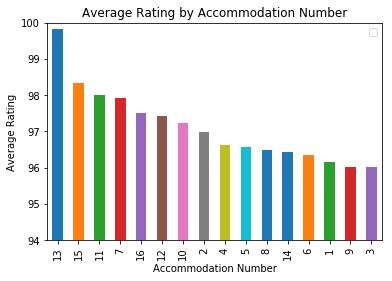

In [32]:
num_type = num_df.plot.bar(y="Average Rating")
plt.ylim(94, 100)
plt.legend("")
plt.xlabel("Accommodation Number")
plt.ylabel("Average Rating")
plt.title("Average Rating by Accommodation Number")

Question 4: Does the number of ammenities available affect a review score?

In [33]:
#create subset of df with just amenity info
amenities_df = master_df.loc[:,["id","amenities","review_scores_rating"]]
amenities_df.head()

,id,amenities,review_scores_rating
0,360,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",100.0
1,590,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",96.0
2,592,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",97.0
3,686,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",95.0
4,1940,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",99.0


In [34]:
#create list of amenities to clean data:
amenity_lists = [amenities for amenities in amenities_df["amenities"]]

#cleanse amenities into a list of lists:
for counter, amenity_list in enumerate(amenity_lists):
    amenity_list_clean = amenity_list.replace('{','')
    amenity_list_clean = amenity_list_clean.replace('}','')
    amenity_list_clean = amenity_list_clean.replace('"','')
    amenity_list_clean = amenity_list_clean.split(',')
    amenity_lists[counter] = amenity_list_clean
print(amenity_lists[0])

['TV', 'Wifi', 'Air conditioning', 'Kitchen', 'Free street parking', 'Hot tub', 'Heating', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Self check-in', 'Keypad', 'Bathtub', 'Hot water', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Garden or backyard', 'Luggage dropoff allowed', 'Long term stays allowed', 'Well-lit path to entrance']


In [35]:
#create list of how many amenities each property has
count_of_amenities = [len(amenity_list) for amenity_list in amenity_lists]

In [36]:
#replace amenities data in df with cleansed version, add count of amenities
amenities_df["amenities"] = amenity_lists
amenities_df["count of amenities"] = count_of_amenities
amenities_df.head()

,id,amenities,review_scores_rating,count of amenities
0,360,"[TV, Wifi, Air conditioning, Kitchen, Free str...",100.0,34
1,590,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",96.0,33
2,592,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",97.0,19
3,686,"[TV, Cable TV, Internet, Wifi, Air conditionin...",95.0,27
4,1940,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...",99.0,43


In [37]:
#create new df with average rating by number of amenities
amenity_count_groups = amenities_df.groupby(["count of amenities"])
properties_with_amenity_count = amenity_count_groups["id"].count()
average_score_by_amenity_count = amenity_count_groups["review_scores_rating"].mean()
count_rating_summary = pd.DataFrame({"Number of Properties":properties_with_amenity_count,
                                     "Average Review Score":average_score_by_amenity_count})
count_rating_summary.reset_index(inplace=True)
count_rating_summary.head()

,count of amenities,Number of Properties,Average Review Score
0,1,1,100.0
1,2,1,100.0
2,3,3,90.0
3,4,1,96.0
4,5,4,95.0


Text(0,0.5,'Average Rating')

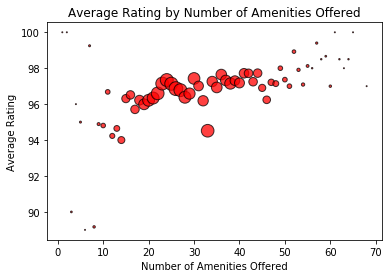

In [38]:
#create scatter plot of average rating by number of amenities
#bubble size weighted by number of properties
plt.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])

plt.title("Average Rating by Number of Amenities Offered")
plt.xlabel("Number of Amenities Offered")
plt.ylabel("Average Rating")

0.2883040226367375


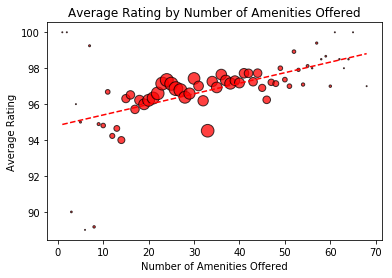

In [39]:
#saw a faint correlation, so running a linear regression and adding a line of best fit
(slope, intercept, r_value, p_value, std_error) = linregress(count_rating_summary["count of amenities"], count_rating_summary["Average Review Score"])
fit = slope * count_rating_summary["count of amenities"] + intercept

#r-squared value
r_squared = r_value ** 2
print(r_squared)

fig, ax = plt.subplots()

plt.title("Average Rating by Number of Amenities Offered")
plt.xlabel("Number of Amenities Offered")
plt.ylabel("Average Rating")

ax.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])
ax.plot(count_rating_summary["count of amenities"], fit, 'r--')

In [40]:
#create property ratings list
ratings = [rating for rating in amenities_df["review_scores_rating"]]

In [41]:
#create lists of unique amenities, how many properties had that amenity, and the sum of ratings for properties with that rating
unique_amenities = []
unique_amenity_count = []
total_amenity_rating = []

for counter,amenity_list in enumerate(amenity_lists):
    for amenity in amenity_list:
        if amenity not in unique_amenities:
            unique_amenities.append(amenity)
            unique_amenity_count.append(1)
            total_amenity_rating.append(ratings[counter])
        else:
            unique_amenity_index = unique_amenities.index(amenity)
            unique_amenity_count[unique_amenity_index] += 1
            total_amenity_rating[unique_amenity_index] += ratings[counter]

In [42]:
#create dataframe for unique amenities
specific_amenity_summary = pd.DataFrame({"Amenity":unique_amenities,
                                         "Properties With Amenity":unique_amenity_count,
                                         "Sum of Rating":total_amenity_rating})
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating
0,TV,3571,345733.0
1,Wifi,4018,388821.0
2,Air conditioning,3324,322146.0
3,Kitchen,3756,363157.0
4,Free street parking,2317,225056.0


In [43]:
#add average rating to unique amenity summary
specific_amenity_summary["Average Rating"] = specific_amenity_summary["Sum of Rating"]/specific_amenity_summary["Properties With Amenity"]
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
0,TV,3571,345733.0,96.816858
1,Wifi,4018,388821.0,96.769786
2,Air conditioning,3324,322146.0,96.915162
3,Kitchen,3756,363157.0,96.687167
4,Free street parking,2317,225056.0,97.132499


In [44]:
data_summary = specific_amenity_summary.describe()
data_summary

,Properties With Amenity,Sum of Rating,Average Rating
count,122.000000,122.000000,122.000000
mean,992.745902,96174.704918,96.977993
std,1225.826842,118712.513842,0.886680
min,1.000000,99.000000,93.523810
25%,75.250000,7226.500000,96.716979
50%,380.000000,36591.500000,97.025692
75%,1624.500000,157792.250000,97.349076
max,4022.000000,389108.000000,99.333333


In [45]:
#create subset of dataframe with just top and bottom 5 amenities
specific_amenity_summary.sort_values(["Average Rating"],ascending=False,inplace=True)
top_5 = specific_amenity_summary.iloc[0:5,:]

specific_amenity_summary.sort_values(["Average Rating"],ascending=True,inplace=True)
bottom_5 = specific_amenity_summary.iloc[0:5,:]

top_5_bottom_5 = top_5.append(bottom_5)
top_5_bottom_5

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
115,Full kitchen,6,596.0,99.333333
121,Electric profiling bed,1,99.0,99.000000
112,Kitchenette,1,99.0,99.000000
110,Beach essentials,9,890.0,98.888889
109,Ground floor access,3,296.0,98.666667
94,Doorman,42,3928.0,93.523810
120,Roll-in shower,5,472.0,94.400000
83,Cleaning before checkout,141,13390.0,94.964539
103,toilet,40,3799.0,94.975000
102,Wide clearance to shower,40,3799.0,94.975000


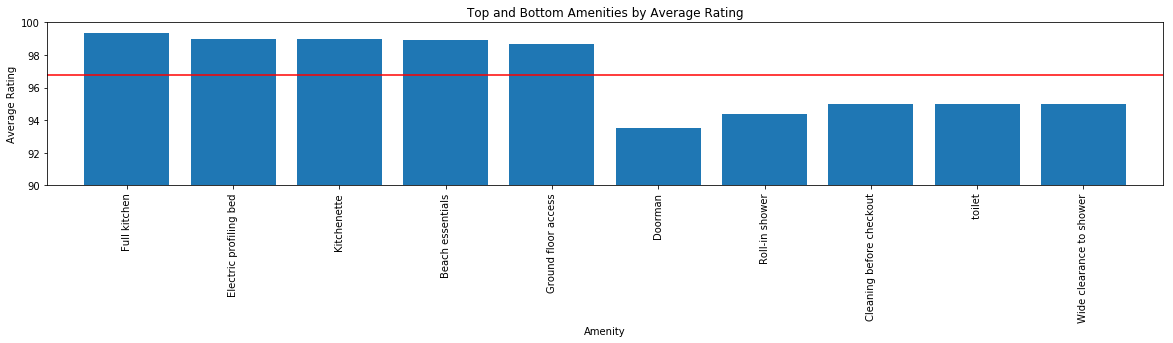

In [46]:
#barchart of top and bottom 5 amenities with line showing average rating
x_axis = np.arange(top_5_bottom_5["Amenity"].count())

plt.figure(figsize=(20,3))

plt.bar(x_axis,top_5_bottom_5["Average Rating"])
plt.xticks(x_axis,top_5_bottom_5["Amenity"],rotation=90)

average = top_5_bottom_5["Average Rating"].mean()
plt.hlines(average,-.75,122.25,color="r")

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(90,100)

plt.title("Top and Bottom Amenities by Average Rating")
plt.xlabel("Amenity")
plt.ylabel("Average Rating")

plt.show()

Question 5: Does the listed information about the host affect the review score?

In [47]:
#sum of reviews
list_grouped = master_df.groupby("calculated_host_listings_count").sum()
list_grouped = list_grouped.reset_index()
list_grouped.head(20)

#count of hosts
list_grouped_host_count = master_df.groupby("calculated_host_listings_count").count()
list_grouped_host_count = list_grouped_host_count.reset_index()
list_grouped.head(20)

#average review score
list_grouped_mean_review = master_df.groupby("calculated_host_listings_count").mean()
list_grouped_mean_review = list_grouped_mean_review.reset_index()
list_grouped_mean_review.head()

,calculated_host_listings_count,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,norm_review_scores_rating
0,1,1.701972e+07,2.018083e+13,NaN,NaN,NaN,6.195664e+07,NaN,1.211081,1.211081,...,43.116270,97.116270,9.879048,9.786968,9.941085,9.939914,9.793211,9.778385,2.920238,0.945590
1,2,1.621952e+07,2.018083e+13,NaN,NaN,NaN,4.324971e+07,NaN,2.416079,2.416079,...,49.535966,97.222849,9.906911,9.799718,9.946403,9.947814,9.808181,9.792666,2.887447,0.947601
2,3,1.592929e+07,2.018083e+13,NaN,NaN,NaN,5.127733e+07,NaN,3.567164,3.567164,...,53.000000,96.440299,9.805970,9.664179,9.929104,9.899254,9.750000,9.716418,3.032276,0.932836
3,4,1.660657e+07,2.018083e+13,NaN,NaN,NaN,6.329319e+07,NaN,4.682171,4.682171,...,67.031008,95.682171,9.759690,9.775194,9.875969,9.798450,9.813953,9.604651,3.883178,0.918532
4,5,1.540404e+07,2.018083e+13,NaN,NaN,NaN,3.489682e+07,NaN,6.321429,6.321429,...,64.392857,96.404762,9.869048,9.702381,9.904762,9.892857,9.738095,9.726190,3.283571,0.932165


Text(0,0.5,'Number of Hosts for Listing Count')

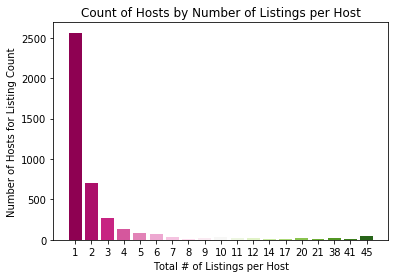

In [48]:
#calculate values. Y values are count of reviews, so pull from number of reviews column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped_host_count["id"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Count of Hosts by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Number of Hosts for Listing Count")

Text(0,0.5,'Number of Reviews for Listing Count')

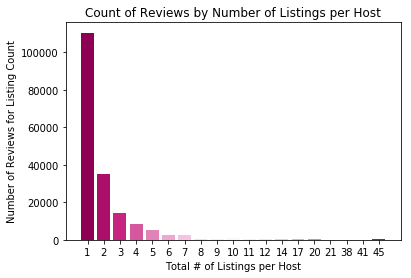

In [49]:
#calculate values. Y values are count of reviews, so pull from number of reviews column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped["number_of_reviews"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Count of Reviews by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Number of Reviews for Listing Count")

(85, 100)

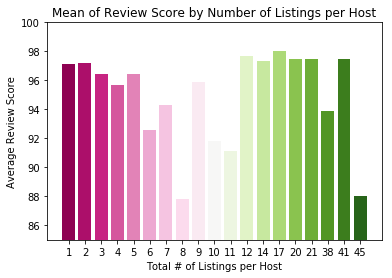

In [50]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
listing_count = list_grouped["calculated_host_listings_count"]
y = list_grouped_mean_review["review_scores_rating"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.PiYG
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, listing_count)

#label chart
plt.title("Mean of Review Score by Number of Listings per Host")
plt.xlabel("Total # of Listings per Host")
plt.ylabel("Average Review Score")
plt.ylim(85, 100)

In [51]:
#groupby cancellation policy

#average review by cancellation policy
cancel_review = master_df.groupby("cancellation_policy").mean()
cancel_review = cancel_review.reset_index()
cancel_review.head()

#Count of hosts by cancellation policy
cancel_review_count = master_df.groupby("cancellation_policy").count()
cancel_review_count = cancel_review_count.reset_index()
cancel_review_count.head()

#sum of reviews
cancel_sum = master_df.groupby("cancellation_policy").sum()
cancel_sum = cancel_sum.reset_index()
list_grouped.head(20)

,calculated_host_listings_count,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,norm_review_scores_rating
0,1,43621529661,51723459641359024,0.0,0.0,0.0,158794878563,0.0,3104,3104,...,110507,248909.0,25320.0,25084.0,25479.0,25476.0,25100.0,25062.0,7484.57,2423.547170
1,2,11499640277,14308206354165332,0.0,0.0,0.0,30664042637,0.0,1713,1713,...,35121,68931.0,7024.0,6948.0,7052.0,7053.0,6954.0,6943.0,2047.20,671.849057
2,3,4269048746,5408461640220464,0.0,0.0,0.0,13742323725,0.0,956,956,...,14204,25846.0,2628.0,2590.0,2661.0,2653.0,2613.0,2604.0,812.65,250.000000
3,4,2142247369,2603326685031492,0.0,0.0,0.0,8164821790,0.0,604,604,...,8647,12343.0,1259.0,1261.0,1274.0,1264.0,1266.0,1239.0,500.93,118.490566
4,5,1293939366,1695189469322832,0.0,0.0,0.0,2931332635,0.0,531,531,...,5409,8098.0,829.0,815.0,832.0,831.0,818.0,817.0,275.82,78.301887
5,6,1256624089,1392477064086612,0.0,0.0,0.0,4562801668,0.0,742,742,...,2722,6388.0,653.0,650.0,667.0,662.0,658.0,639.0,227.86,59.339623
6,7,489192684,686148118535432,0.0,0.0,0.0,1575081546,0.0,335,335,...,2823,3205.0,326.0,326.0,332.0,331.0,318.0,321.0,135.55,30.320755
7,8,182531937,242169924188976,0.0,0.0,0.0,503087814,0.0,283,283,...,561,1054.0,109.0,109.0,118.0,118.0,110.0,102.0,22.03,9.245283
8,9,405066530,343074059267716,0.0,0.0,0.0,2358022228,0.0,153,153,...,388,1630.0,168.0,167.0,164.0,165.0,162.0,164.0,75.97,15.679245
9,10,662971027,625605637488188,0.0,0.0,0.0,2738928080,0.0,520,520,...,956,2846.0,294.0,286.0,297.0,294.0,296.0,289.0,96.37,26.207547


(94, 100)

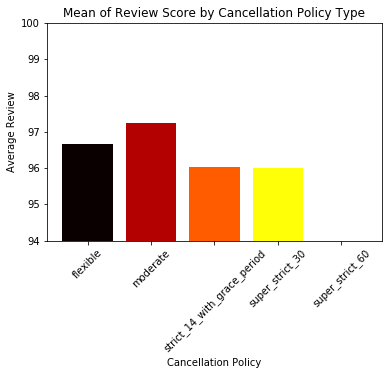

In [52]:
#calculate values. Y values are average reviews, so pull from review score. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_policy = cancel_review["cancellation_policy"]
y = cancel_review["review_scores_rating"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors, align="center")
plt.xticks(x_axis, cancel_rate_policy,rotation=45)

#label chart
plt.title("Mean of Review Score by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Average Review")
plt.ylim(94, 100)

Text(0,0.5,'Host Count')

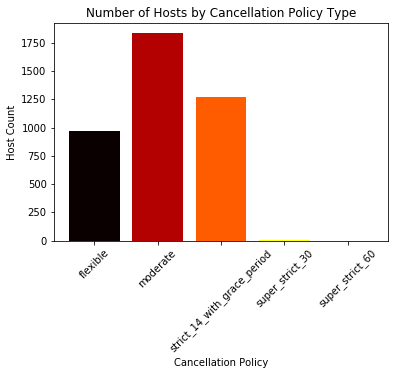

In [53]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_count = cancel_review_count["cancellation_policy"]
y = cancel_review_count["id"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, cancel_rate_count,rotation=45)

#label chart
plt.title("Number of Hosts by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Host Count")

Text(0,0.5,'Reviews Count')

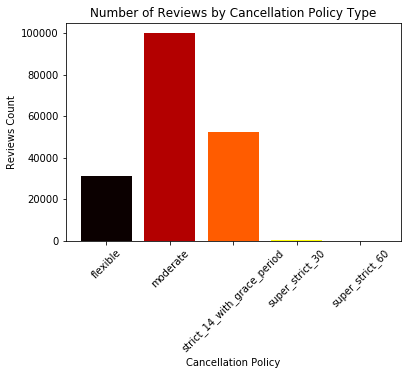

In [54]:
#calculate values. Y values are count of reviews, so pull from id column. 
#pull x tick labels from listing count column. Set xticks first by taking len of y values (in essence the quantity of x values)
cancel_rate_sum = cancel_sum["cancellation_policy"]
y = cancel_sum["number_of_reviews"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.hot
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, cancel_rate_sum,rotation=45)

#label chart
plt.title("Number of Reviews by Cancellation Policy Type")
plt.xlabel("Cancellation Policy")
plt.ylabel("Reviews Count")

In [55]:
#guests included; is business travel ready, reviews vs average nightly price

business_group = master_df.groupby(['is_business_travel_ready'])
# Aggregate it
aggregated_df = business_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df.head()

,is_business_travel_ready,review_scores_rating,host_id,number_of_reviews
0,f,96.720412,4081,4081


In [56]:
super_group = master_df.groupby(['host_is_superhost'])
# Aggregate it
aggregated_df = super_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df.head()

,host_is_superhost,review_scores_rating,host_id,number_of_reviews
0,f,95.639175,2134,2134
1,t,97.905496,1947,1947


(94, 100)

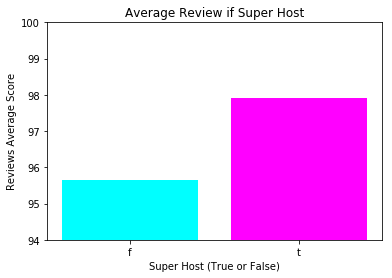

In [57]:
y = summary_df["review_scores_rating"]
x_labels = summary_df["host_is_superhost"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.cool
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels)

#label chart
plt.title("Average Review if Super Host")
plt.xlabel("Super Host (True or False)")
plt.ylabel("Reviews Average Score")
plt.ylim(94, 100)

In [58]:
name_group = master_df.groupby(['host_name'])
# Aggregate it
aggregated_df = name_group.agg({'review_scores_rating': 'mean', 'host_id': 'count','number_of_reviews': 'count'})
# Reset index (only type)
summary_df = aggregated_df.reset_index()
summary_df = summary_df.sort_values("host_id",ascending = False)
summary_df.head()


,host_name,review_scores_rating,host_id,number_of_reviews
1045,Michael,96.655172,58,58
53,Allison,95.155556,45,45
1357,Stay Alfred,88.000000,42,42
1291,Scott,97.476190,42,42
1284,Sarah,96.527778,36,36


(-1, 11.5)

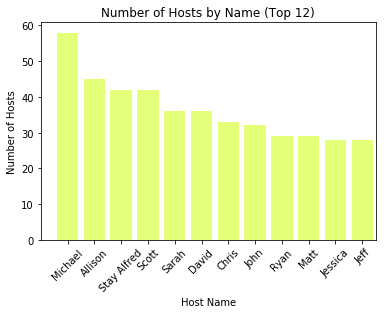

In [59]:
#count of hosts by name

y = summary_df["host_id"]
x_labels = summary_df["host_name"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.Wistia
colors = cmap(np.linspace(0.,1., len(y)))

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels, rotation=45)

#label chart
plt.title("Number of Hosts by Name (Top 12)")
plt.xlabel("Host Name")
plt.ylabel("Number of Hosts")
plt.xlim(-1,11.5)

In [2]:
#review of hosts by name

y = summary_df["review_scores_rating"]
x_labels = summary_df["host_name"]
x_axis = np.arange(len(y))

#choose color map to import for chart
cmap = plt.cm.winter
colors = cmap(np.linspace(0.,1., 12)

#plot chart, and replace x ticks with listing count values
plt.bar(x_axis,y,color= colors,align="center")
plt.xticks(x_axis, x_labels, rotation=45)

#label chart
plt.title("Average Reviews by Host Name (Top 12)")
plt.xlabel("Host Name")
plt.ylabel("Number of Hosts")
plt.xlim(-1,11.5)
plt.ylim(80,100)

SyntaxError: invalid syntax (<ipython-input-2-7368a825ad63>, line 12)